# Machine Learning in Digital Marketing

## Importing libraries and dataframe

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('train.csv')

## Quick Exploration

In [3]:
df.head()

channelGrouping      date  \
0  Organic Search  20160902   
1  Organic Search  20160902   
2      Affiliates  20160902   
3  Organic Search  20160902   
4  Organic Search  20160902   

                                              device        fullVisitorId  \
0  {"browser": "Chrome", "browserVersion": "not a...  9674781571160116268   
1  {"browser": "Chrome", "browserVersion": "not a...  8590648239310839049   
2  {"browser": "Chrome", "browserVersion": "not a...  9772828344252850532   
3  {"browser": "Safari", "browserVersion": "not a...  1350700416054916432   
4  {"browser": "Safari", "browserVersion": "not a...  1350700416054916432   

                                          geoNetwork  \
0  {"continent": "Asia", "subContinent": "Southea...   
1  {"continent": "Europe", "subContinent": "Easte...   
2  {"continent": "Americas", "subContinent": "Sou...   
3  {"continent": "Americas", "subContinent": "Nor...   
4  {"continent": "Americas", "subContinent": "Nor...   

                        sessionId  socialEngagementType  \
0  9674781571160116268_1472804607  Not Socially Engaged   
1  8590648239310839049_1472835928  Not Socially Engaged   
2  9772828344252850532_1472856802  Not Socially Engaged   
3  1350700416054916432_1472879649  Not Socially Engaged   
4  1350700416054916432_1472829671  Not Socially Engaged   

                                              totals  \
0  {"visits": "1", "hits": "1", "pageviews": "1",...   
1  {"visits": "1", "hits": "1", "pageviews": "1",...   
2  {"visits": "1", "hits": "1", "pageviews": "1",...   
3  {"visits": "1", "hits": "1", "pageviews": "1",...   
4  {"visits": "1", "hits": "5", "pageviews": "4",...   

                                       trafficSource     visitId  visitNumber  \
0  {"campaign": "(not set)", "source": "google", ...  1472804607            1   
1  {"campaign": "(not set)", "source": "google", ...  1472835928            1   
2  {"campaign": "Data Share Promo", "source": "Pa...  1472856802            1   
3  {"campaign": "(not set)", "source": "google", ...  1472879649            2   
4  {"campaign": "(not set)", "source": "google", ...  1472829671            1   

   visitStartTime  
0      1472804607  
1      1472835928  
2      1472856802  
3      1472879649  
4      1472829671

In [4]:
df.shape

(12283, 12)

In [5]:
# checking unique visitors by their id
len(df.fullVisitorId.unique())

9996

## Dtypes

In [6]:
df.dtypes

channelGrouping         object
date                     int64
device                  object
fullVisitorId           uint64
geoNetwork              object
sessionId               object
socialEngagementType    object
totals                  object
trafficSource           object
visitId                  int64
visitNumber              int64
visitStartTime           int64
dtype: object

We'll change date, fullVisitorId and VisitId dtype from int to object. We don't intend to treat them as numbers, making aggregation as sum, average, etc. Treating them as string, it is possible to slice information, make groupby operations, count unique values and others operations. 

In [7]:
df = pd.read_csv('train.csv', dtype={'date':object,'fullVisitorId':object,'visitId':object})

In [8]:
df.dtypes

channelGrouping         object
date                    object
device                  object
fullVisitorId           object
geoNetwork              object
sessionId               object
socialEngagementType    object
totals                  object
trafficSource           object
visitId                 object
visitNumber              int64
visitStartTime           int64
dtype: object

In [9]:
df.head()

channelGrouping      date  \
0  Organic Search  20160902   
1  Organic Search  20160902   
2      Affiliates  20160902   
3  Organic Search  20160902   
4  Organic Search  20160902   

                                              device        fullVisitorId  \
0  {"browser": "Chrome", "browserVersion": "not a...  9674781571160116268   
1  {"browser": "Chrome", "browserVersion": "not a...  8590648239310839049   
2  {"browser": "Chrome", "browserVersion": "not a...  9772828344252850532   
3  {"browser": "Safari", "browserVersion": "not a...  1350700416054916432   
4  {"browser": "Safari", "browserVersion": "not a...  1350700416054916432   

                                          geoNetwork  \
0  {"continent": "Asia", "subContinent": "Southea...   
1  {"continent": "Europe", "subContinent": "Easte...   
2  {"continent": "Americas", "subContinent": "Sou...   
3  {"continent": "Americas", "subContinent": "Nor...   
4  {"continent": "Americas", "subContinent": "Nor...   

                        sessionId  socialEngagementType  \
0  9674781571160116268_1472804607  Not Socially Engaged   
1  8590648239310839049_1472835928  Not Socially Engaged   
2  9772828344252850532_1472856802  Not Socially Engaged   
3  1350700416054916432_1472879649  Not Socially Engaged   
4  1350700416054916432_1472829671  Not Socially Engaged   

                                              totals  \
0  {"visits": "1", "hits": "1", "pageviews": "1",...   
1  {"visits": "1", "hits": "1", "pageviews": "1",...   
2  {"visits": "1", "hits": "1", "pageviews": "1",...   
3  {"visits": "1", "hits": "1", "pageviews": "1",...   
4  {"visits": "1", "hits": "5", "pageviews": "4",...   

                                       trafficSource     visitId  visitNumber  \
0  {"campaign": "(not set)", "source": "google", ...  1472804607            1   
1  {"campaign": "(not set)", "source": "google", ...  1472835928            1   
2  {"campaign": "Data Share Promo", "source": "Pa...  1472856802            1   
3  {"campaign": "(not set)", "source": "google", ...  1472879649            2   
4  {"campaign": "(not set)", "source": "google", ...  1472829671            1   

   visitStartTime  
0      1472804607  
1      1472835928  
2      1472856802  
3      1472879649  
4      1472829671

There are some json columns in the dataset. Let's take a look at them and extract their info.

In [10]:
df.device.iloc[0]

'{"browser": "Chrome", "browserVersion": "not available in demo dataset", "browserSize": "not available in demo dataset", "operatingSystem": "Windows", "operatingSystemVersion": "not available in demo dataset", "isMobile": false, "mobileDeviceBranding": "not available in demo dataset", "mobileDeviceModel": "not available in demo dataset", "mobileInputSelector": "not available in demo dataset", "mobileDeviceInfo": "not available in demo dataset", "mobileDeviceMarketingName": "not available in demo dataset", "flashVersion": "not available in demo dataset", "language": "not available in demo dataset", "screenColors": "not available in demo dataset", "screenResolution": "not available in demo dataset", "deviceCategory": "desktop"}'

In [11]:
type(df.device.iloc[0])

str

In [12]:
import json
type(json.loads(df.device.iloc[0]))

dict

In [13]:
json.loads(df.device.iloc[0])

{'browser': 'Chrome',
 'browserVersion': 'not available in demo dataset',
 'browserSize': 'not available in demo dataset',
 'operatingSystem': 'Windows',
 'operatingSystemVersion': 'not available in demo dataset',
 'isMobile': False,
 'mobileDeviceBranding': 'not available in demo dataset',
 'mobileDeviceModel': 'not available in demo dataset',
 'mobileInputSelector': 'not available in demo dataset',
 'mobileDeviceInfo': 'not available in demo dataset',
 'mobileDeviceMarketingName': 'not available in demo dataset',
 'flashVersion': 'not available in demo dataset',
 'language': 'not available in demo dataset',
 'screenColors': 'not available in demo dataset',
 'screenResolution': 'not available in demo dataset',
 'deviceCategory': 'desktop'}

We`ll transform the dict in a dataframe which each key is a column

In [14]:
pd.DataFrame([json.loads(row) for row in df.device])

browser                 browserVersion  \
0               Chrome  not available in demo dataset   
1               Chrome  not available in demo dataset   
2               Chrome  not available in demo dataset   
3               Safari  not available in demo dataset   
4               Safari  not available in demo dataset   
...                ...                            ...   
12278           Chrome  not available in demo dataset   
12279           Chrome  not available in demo dataset   
12280           Chrome  not available in demo dataset   
12281           Chrome  not available in demo dataset   
12282  Android Webview  not available in demo dataset   

                         browserSize operatingSystem  \
0      not available in demo dataset         Windows   
1      not available in demo dataset       Macintosh   
2      not available in demo dataset       Macintosh   
3      not available in demo dataset             iOS   
4      not available in demo dataset             iOS   
...                              ...             ...   
12278  not available in demo dataset         Windows   
12279  not available in demo dataset         Android   
12280  not available in demo dataset           Linux   
12281  not available in demo dataset         Android   
12282  not available in demo dataset         Android   

              operatingSystemVersion  isMobile           mobileDeviceBranding  \
0      not available in demo dataset     False  not available in demo dataset   
1      not available in demo dataset     False  not available in demo dataset   
2      not available in demo dataset     False  not available in demo dataset   
3      not available in demo dataset      True  not available in demo dataset   
4      not available in demo dataset      True  not available in demo dataset   
...                              ...       ...                            ...   
12278  not available in demo dataset     False  not available in demo dataset   
12279  not available in demo dataset      True  not available in demo dataset   
12280  not available in demo dataset     False  not available in demo dataset   
12281  not available in demo dataset      True  not available in demo dataset   
12282  not available in demo dataset      True  not available in demo dataset   

                   mobileDeviceModel            mobileInputSelector  \
0      not available in demo dataset  not available in demo dataset   
1      not available in demo dataset  not available in demo dataset   
2      not available in demo dataset  not available in demo dataset   
3      not available in demo dataset  not available in demo dataset   
4      not available in demo dataset  not available in demo dataset   
...                              ...                            ...   
12278  not available in demo dataset  not available in demo dataset   
12279  not available in demo dataset  not available in demo dataset   
12280  not available in demo dataset  not available in demo dataset   
12281  not available in demo dataset  not available in demo dataset   
12282  not available in demo dataset  not available in demo dataset   

                    mobileDeviceInfo      mobileDeviceMarketingName  \
0      not available in demo dataset  not available in demo dataset   
1      not available in demo dataset  not available in demo dataset   
2      not available in demo dataset  not available in demo dataset   
3      not available in demo dataset  not available in demo dataset   
4      not available in demo dataset  not available in demo dataset   
...                              ...                            ...   
12278  not available in demo dataset  not available in demo dataset   
12279  not available in demo dataset  not available in demo dataset   
12280  not available in demo dataset  not available in demo dataset   
12281  not available in demo dataset  not available in demo dataset   
12282  not available in demo dataset  not availabl

Extracting info from json columns and join to the original df

In [15]:
jsonColumns = ['device','geoNetwork','trafficSource','totals']

for column in jsonColumns:
    df = df.join(pd.DataFrame([json.loads(row) for row in df[column]]))

In [16]:
df.head()

channelGrouping      date  \
0  Organic Search  20160902   
1  Organic Search  20160902   
2      Affiliates  20160902   
3  Organic Search  20160902   
4  Organic Search  20160902   

                                              device        fullVisitorId  \
0  {"browser": "Chrome", "browserVersion": "not a...  9674781571160116268   
1  {"browser": "Chrome", "browserVersion": "not a...  8590648239310839049   
2  {"browser": "Chrome", "browserVersion": "not a...  9772828344252850532   
3  {"browser": "Safari", "browserVersion": "not a...  1350700416054916432   
4  {"browser": "Safari", "browserVersion": "not a...  1350700416054916432   

                                          geoNetwork  \
0  {"continent": "Asia", "subContinent": "Southea...   
1  {"continent": "Europe", "subContinent": "Easte...   
2  {"continent": "Americas", "subContinent": "Sou...   
3  {"continent": "Americas", "subContinent": "Nor...   
4  {"continent": "Americas", "subContinent": "Nor...   

                        sessionId  socialEngagementType  \
0  9674781571160116268_1472804607  Not Socially Engaged   
1  8590648239310839049_1472835928  Not Socially Engaged   
2  9772828344252850532_1472856802  Not Socially Engaged   
3  1350700416054916432_1472879649  Not Socially Engaged   
4  1350700416054916432_1472829671  Not Socially Engaged   

                                              totals  \
0  {"visits": "1", "hits": "1", "pageviews": "1",...   
1  {"visits": "1", "hits": "1", "pageviews": "1",...   
2  {"visits": "1", "hits": "1", "pageviews": "1",...   
3  {"visits": "1", "hits": "1", "pageviews": "1",...   
4  {"visits": "1", "hits": "5", "pageviews": "4",...   

                                       trafficSource     visitId  ...  \
0  {"campaign": "(not set)", "source": "google", ...  1472804607  ...   
1  {"campaign": "(not set)", "source": "google", ...  1472835928  ...   
2  {"campaign": "Data Share Promo", "source": "Pa...  1472856802  ...   
3  {"campaign": "(not set)", "source": "google", ...  1472879649  ...   
4  {"campaign": "(not set)", "source": "google", ...  1472829671  ...   

   isTrueDirect  referralPath adContent campaignCode visits hits pageviews  \
0           NaN           NaN       NaN          NaN      1    1         1   
1           NaN           NaN       NaN          NaN      1    1         1   
2           NaN           NaN       NaN          NaN      1    1         1   
3          True           NaN       NaN          NaN      1    1         1   
4           NaN           NaN       NaN          NaN      1    5         4   

   bounces newVisits transactionRevenue  
0        1         1                NaN  
1        1         1                NaN  
2        1         1                NaN  
3        1       NaN                NaN  
4      NaN         1                NaN  

[5 rows x 54 columns]

We can drop json columns since we already have all the info in the dataframe

In [17]:
df.drop(jsonColumns, axis=1, inplace=True)

In [18]:
df.head().T

0  \
channelGrouping                                               Organic Search   
date                                                                20160902   
fullVisitorId                                            9674781571160116268   
sessionId                                     9674781571160116268_1472804607   
socialEngagementType                                    Not Socially Engaged   
visitId                                                           1472804607   
visitNumber                                                                1   
visitStartTime                                                    1472804607   
browser                                                               Chrome   
browserVersion                                 not available in demo dataset   
browserSize                                    not available in demo dataset   
operatingSystem                                                      Windows   
operatingSystemVersion                         not available in demo dataset   
isMobile                                                               False   
mobileDeviceBranding                           not available in demo dataset   
mobileDeviceModel                              not available in demo dataset   
mobileInputSelector                            not available in demo dataset   
mobileDeviceInfo                               not available in demo dataset   
mobileDeviceMarketingName                      not available in demo dataset   
flashVersion                                   not available in demo dataset   
language                                       not available in demo dataset   
screenColors                                   not available in demo dataset   
screenResolution                               not available in demo dataset   
deviceCategory                                                       desktop   
continent                                                               Asia   
subContinent                                                  Southeast Asia   
country                                                            Singapore   
region                                                             (not set)   
metro                                                              (not set)   
city                                                               Singapore   
cityId                                         not available in demo dataset   
networkDomain                                                unknown.unknown   
latitude                                       not available in demo dataset   
longitude                                      not available in demo dataset   
networkLocation                                not available in demo dataset   
campaign                                                           (not set)   
source                                                                google   
medium                                                               organic   
keyword                                                       (not provided)   
adwordsClickInfo           {'criteriaParameters': 'not available in demo ...   
isTrueDirect                                                             NaN   
referralPath                                                             NaN   
adContent                                                                NaN   
campaignCode                                                             NaN   
visits                                                                     1   
hits                                                                       1   
pageviews                                                                  1   
bounces                                                                    1   
newVisits                                                                  1   
transactionRevenue                                                       Na

# Limpando os dados

Still have a json column in the dataset: adwordsClickInfo. Since its info it is not available for this demo set, we can drop it.

In [19]:
df.drop('adwordsClickInfo',axis=1,inplace=True)

We'll drop columns that have the same information in every row. Constant values will not contribute for training our model. 

In [20]:
constantColumns = []
for column in df.columns:
    if df[column].nunique() == 1:
        constantColumns.append(column)

constantColumns

['socialEngagementType',
 'browserVersion',
 'browserSize',
 'operatingSystemVersion',
 'mobileDeviceBranding',
 'mobileDeviceModel',
 'mobileInputSelector',
 'mobileDeviceInfo',
 'mobileDeviceMarketingName',
 'flashVersion',
 'language',
 'screenColors',
 'screenResolution',
 'cityId',
 'latitude',
 'longitude',
 'networkLocation',
 'isTrueDirect',
 'campaignCode',
 'visits',
 'bounces',
 'newVisits']

In [21]:
len(constantColumns)

22

In [22]:
df.drop(constantColumns,axis=1,inplace=True)

In [23]:
df.head().T

0  \
channelGrouping                     Organic Search   
date                                      20160902   
fullVisitorId                  9674781571160116268   
sessionId           9674781571160116268_1472804607   
visitId                                 1472804607   
visitNumber                                      1   
visitStartTime                          1472804607   
browser                                     Chrome   
operatingSystem                            Windows   
isMobile                                     False   
deviceCategory                             desktop   
continent                                     Asia   
subContinent                        Southeast Asia   
country                                  Singapore   
region                                   (not set)   
metro                                    (not set)   
city                                     Singapore   
networkDomain                      unknown.unknown   
campaign                                 (not set)   
source                                      google   
medium                                     organic   
keyword                             (not provided)   
referralPath                                   NaN   
adContent                                      NaN   
hits                                             1   
pageviews                                        1   
transactionRevenue                             NaN   

                                                 1  \
channelGrouping                     Organic Search   
date                                      20160902   
fullVisitorId                  8590648239310839049   
sessionId           8590648239310839049_1472835928   
visitId                                 1472835928   
visitNumber                                      1   
visitStartTime                          1472835928   
browser                                     Chrome   
operatingSystem                          Macintosh   
isMobile                                     False   
deviceCategory                             desktop   
continent                                   Europe   
subContinent                        Eastern Europe   
country                                     Poland   
region               not available in demo dataset   
metro                not available in demo dataset   
city                 not available in demo dataset   
networkDomain                             tpnet.pl   
campaign                                 (not set)   
source                                      google   
medium                                     organic   
keyword                             (not provided)   
referralPath                                   NaN   
adContent                                      NaN   
hits                                             1   
pageviews                                        1   
transactionRevenue                             NaN   

                                                 2  \
channelGrouping                         Affiliates   
date                                      20160902   
fullVisitorId                  9772828344252850532   
sessionId           9772828344252850532_1472856802   
visitId                                 1472856802   
visitNumber                                      1   
visitStartTime                          1472856802   
browser                                     Chrome   
operatingSystem                          Macintosh   
isMobile                                     False   
deviceCategory                             desktop   
continent                                 Americas   
subContinent                         South America   
country                                  Argentina   
region                                Buenos Aires   
metro                                    (not set)   
city                                  Buenos Aires   
networkDomain                   phonevision.com.ar 

In [24]:
df.shape

(12283, 27)

In [25]:
df.dtypes

channelGrouping       object
date                  object
fullVisitorId         object
sessionId             object
visitId               object
visitNumber            int64
visitStartTime         int64
browser               object
operatingSystem       object
isMobile                bool
deviceCategory        object
continent             object
subContinent          object
country               object
region                object
metro                 object
city                  object
networkDomain         object
campaign              object
source                object
medium                object
keyword               object
referralPath          object
adContent             object
hits                  object
pageviews             object
transactionRevenue    object
dtype: object

Changing dtype of some numerical columns that are classified as strings

In [26]:
quant = ['hits','pageviews', 'transactionRevenue']
for column in quant:
    df[column] = pd.to_numeric(df[column])

In [27]:
df.transactionRevenue.fillna(0, inplace=True)
df.transactionRevenue = df.transactionRevenue / 1000000 # the values were multiplied by 10ˆ6

# Separando as bases

In [854]:
y = df_quant.transactionRevenue.copy()

In [855]:
X = df_quant.drop('transactionRevenue',axis=1)

In [856]:
from sklearn.model_selection import train_test_split

In [857]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [858]:
X_train.head()

fullVisitorId  bounces  hits  newVisits  pageviews
9066  9160012321913348805      0.0    16        1.0         12
2603  3214687528122048939      1.0     1        1.0          1
8832  8936592721963873590      0.0    13        1.0         13
1579  2277422319005476191      1.0     1        1.0          1
9887   989458850703391704      1.0     1        1.0          1

In [859]:
y_train.head()

9066    144.97
2603      0.00
8832      6.99
1579      0.00
9887      0.00
Name: transactionRevenue, dtype: float64

# Regressão Linear

In [860]:
from sklearn.linear_model import LinearRegression

In [861]:
reg = LinearRegression()

In [862]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [863]:
reg_predict = reg.predict(X_test)

In [864]:
reg_predict

array([1.55166047, 1.55520911, 1.68772647, ..., 1.61310964, 1.52678998,
       1.58119137])

In [865]:
X_test.head()

fullVisitorId  bounces  hits  newVisits  pageviews
4122  4578458064892235105      1.0     1        1.0          1
4065  4521976094244865667      0.0     2        1.0          2
1731  2412763304338054923      1.0     1        1.0          1
4740  5154139143679150892      0.0     6        1.0          5
6391  6631771261952767652      0.0     7        1.0          7

# Avaliando os resultados

In [866]:
resultados = pd.DataFrame()

In [867]:
resultados = pd.DataFrame()
resultados['revenue'] = y_test
resultados['predict'] = reg_predict
resultados['erro'] = reg_predict - y_test

In [868]:
resultados.head()

revenue   predict      erro
4122      0.0  1.551660  1.551660
4065      0.0  1.555209  1.555209
1731      0.0  1.687726  1.687726
4740      0.0  1.515492  1.515492
6391      0.0  1.422655  1.422655

In [869]:
resultados[resultados.revenue > 0]

revenue   predict        erro
3006    32.49  1.616211  -30.873789
5928    74.85  1.449755  -73.400245
8361   424.50  1.306194 -423.193806
8612    55.99  1.291322  -54.698678
416     15.19  1.831725  -13.358275
4077     5.97  1.554336   -4.415664
8146    27.19  1.318915  -25.871085
4908   372.65  1.505642 -371.144358
9395    29.98  1.779852  -28.200148
8728   101.95  1.284318 -100.665682
9609    95.80  1.232727  -94.567273
1691    19.19  1.824359  -17.365641
568    278.03  1.830845 -276.199155
8288   478.40  1.309554 -477.090446
5478   112.37  1.802707 -110.567293
532      7.99  1.756152   -6.233848
3033    39.99  1.614688  -38.375312
7508   479.03  1.355818 -477.674182
9918    45.57  1.215463  -44.354537
8542    25.90  1.295685  -24.604315
742     41.72  1.829889  -39.890111
5331   489.20  1.480319 -487.719681
9742   239.88  1.778000 -238.102000
3948    23.97  1.562700  -22.407300
5457   647.53  1.474237 -646.055763
5157    33.59  1.491463  -32.098537
7282    26.95  1.369326  -25.580674
6765    64.94  1.399692  -63.540308
467     67.19  1.759766  -65.430234
3653    49.19  1.578961  -47.611039
5381   374.85  1.478237 -373.371763
5314   107.94  1.481897 -106.458103
6680     8.48  1.403985   -7.076015
132     26.49  1.835073  -24.654927
8098    24.27  1.321617  -22.948383
7942    52.02  1.331493  -50.688507
8314   119.99  1.308114 -118.681886
9085    14.00  1.262540  -12.737460
3656   217.44  1.578817 -215.861183
4317   284.34  1.540722 -282.799278
3319   330.51  1.597845 -328.912155
5729    79.16  1.460660  -77.699340
9580    13.59  1.233967  -12.356033
7612   239.60  1.349987 -238.250013
3910    32.94  1.564537  -31.375463
6568     3.49  1.411874   -2.078126
4818   571.69  1.511066 -570.178934

In [870]:
import numpy as np

## MSE

In [871]:
np.mean((reg_predict - y_test)**2)

807.245929682092

## RMSE

In [872]:
np.sqrt(np.mean((reg_predict - y_test)**2))

28.412073660366502

In [873]:
from sklearn.metrics import mean_squared_error

In [874]:
np.sqrt(mean_squared_error(y_test,reg_predict))

28.412073660366516

In [875]:
np.mean(df_quant.transactionRevenue)

1.778953686105831

In [876]:
np.std(df_quant.transactionRevenue)

25.129905708017944

In [877]:
import seaborn as sns

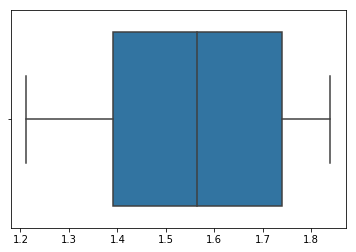

In [878]:
sns.boxplot(reg_predict)

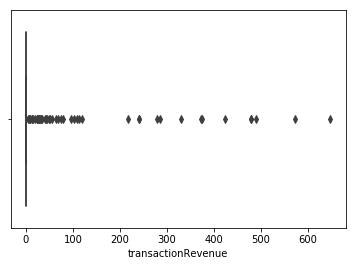

In [879]:
sns.boxplot(y_test)

C:\Users\Alura Preto\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


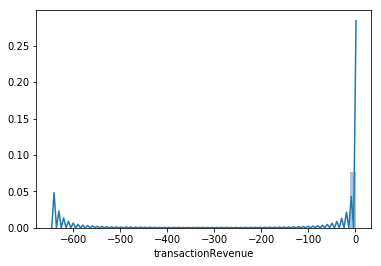

In [880]:
sns.distplot(reg_predict - y_test)

# Melhorando o Feature Engineering

In [28]:
visitas_ultima = df.groupby('fullVisitorId',as_index=False)

In [29]:
visitas_ultima = visitas_ultima['visitNumber'].max()

In [30]:
visitas_ultima.head()

fullVisitorId  visitNumber
0  0002365800130207040            1
1  0010286039787739137            1
2  0011056874471185769            1
3  0014443856125569702            1
4  0017260116665815114            6

In [884]:
df.head()

channelGrouping      date        fullVisitorId  \
0  Organic Search  20160902  9674781571160116268   
1  Organic Search  20160902  8590648239310839049   
2      Affiliates  20160902  9772828344252850532   
3  Organic Search  20160902  1350700416054916432   
4  Organic Search  20160902  1350700416054916432   

                        sessionId     visitId  visitNumber  visitStartTime  \
0  9674781571160116268_1472804607  1472804607            1      1472804607   
1  8590648239310839049_1472835928  1472835928            1      1472835928   
2  9772828344252850532_1472856802  1472856802            1      1472856802   
3  1350700416054916432_1472879649  1472879649            2      1472879649   
4  1350700416054916432_1472829671  1472829671            1      1472829671   

  browser deviceCategory  isMobile        ...         isTrueDirect  \
0  Chrome        desktop     False        ...                  NaN   
1  Chrome        desktop     False        ...                  NaN   
2  Chrome        desktop     False        ...                  NaN   
3  Safari         mobile      True        ...                 True   
4  Safari         mobile      True        ...                  NaN   

          keyword     medium referralPath    source bounces hits newVisits  \
0  (not provided)    organic          NaN    google     1.0    1       1.0   
1  (not provided)    organic          NaN    google     1.0    1       1.0   
2             NaN  affiliate          NaN  Partners     1.0    1       1.0   
3  (not provided)    organic          NaN    google     1.0    1       NaN   
4  (not provided)    organic          NaN    google     NaN    5       1.0   

  pageviews transactionRevenue  
0         1                0.0  
1         1                0.0  
2         1                0.0  
3         1                0.0  
4         4                0.0  

[5 rows x 31 columns]

In [885]:
usuarios_visitas_unicos = df.drop_duplicates(subset=['fullVisitorId','visitNumber'])

In [886]:
usuarios_visitas_unicos.head()

channelGrouping      date        fullVisitorId  \
0  Organic Search  20160902  9674781571160116268   
1  Organic Search  20160902  8590648239310839049   
2      Affiliates  20160902  9772828344252850532   
3  Organic Search  20160902  1350700416054916432   
4  Organic Search  20160902  1350700416054916432   

                        sessionId     visitId  visitNumber  visitStartTime  \
0  9674781571160116268_1472804607  1472804607            1      1472804607   
1  8590648239310839049_1472835928  1472835928            1      1472835928   
2  9772828344252850532_1472856802  1472856802            1      1472856802   
3  1350700416054916432_1472879649  1472879649            2      1472879649   
4  1350700416054916432_1472829671  1472829671            1      1472829671   

  browser deviceCategory  isMobile        ...         isTrueDirect  \
0  Chrome        desktop     False        ...                  NaN   
1  Chrome        desktop     False        ...                  NaN   
2  Chrome        desktop     False        ...                  NaN   
3  Safari         mobile      True        ...                 True   
4  Safari         mobile      True        ...                  NaN   

          keyword     medium referralPath    source bounces hits newVisits  \
0  (not provided)    organic          NaN    google     1.0    1       1.0   
1  (not provided)    organic          NaN    google     1.0    1       1.0   
2             NaN  affiliate          NaN  Partners     1.0    1       1.0   
3  (not provided)    organic          NaN    google     1.0    1       NaN   
4  (not provided)    organic          NaN    google     NaN    5       1.0   

  pageviews transactionRevenue  
0         1                0.0  
1         1                0.0  
2         1                0.0  
3         1                0.0  
4         4                0.0  

[5 rows x 31 columns]

In [887]:
usuarios_visitas_unicos.shape

(12270, 31)

In [888]:
visitas = pd.merge(visitas_ultima,usuarios_visitas_unicos,left_on=['fullVisitorId','visitNumber'],
                  right_on=['fullVisitorId','visitNumber'],how='left')

In [889]:
visitas.head()

fullVisitorId  visitNumber channelGrouping      date  \
0  0002365800130207040            1          Social  20160904   
1  0010286039787739137            1  Organic Search  20160928   
2  0011056874471185769            1          Social  20161205   
3  0014443856125569702            1          Social  20161002   
4  0017260116665815114            6          Direct  20170420   

                        sessionId     visitId  visitStartTime browser  \
0  0002365800130207040_1472974804  1472974804      1472974804    Edge   
1  0010286039787739137_1475084026  1475084026      1475084026  Chrome   
2  0011056874471185769_1480996024  1480996024      1480996024  Chrome   
3  0014443856125569702_1475423502  1475423502      1475423502   Opera   
4  0017260116665815114_1492707286  1492707286      1492707286  Safari   

  deviceCategory  isMobile        ...         isTrueDirect         keyword  \
0        desktop     False        ...                  NaN             NaN   
1        desktop     False        ...                  NaN  (not provided)   
2        desktop     False        ...                  NaN             NaN   
3        desktop     False        ...                  NaN             NaN   
4        desktop     False        ...                 True             NaN   

     medium   referralPath       source bounces hits newVisits pageviews  \
0  referral  /yt/about/ru/  youtube.com     1.0    1       1.0         1   
1   organic            NaN       google     NaN    4       1.0         3   
2  referral     /yt/about/  youtube.com     NaN    2       1.0         2   
3  referral  /yt/about/ro/  youtube.com     1.0    1       1.0         1   
4    (none)            NaN     (direct)     NaN    2       NaN         2   

  transactionRevenue  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4                0.0  

[5 rows x 31 columns]

In [890]:
visitas.shape

(9997, 31)

In [891]:
visitas_primeira = df.groupby('fullVisitorId',as_index=False)

In [892]:
visitas_primeira = visitas_primeira['visitNumber'].min()

In [893]:
visitas_primeira.head()

fullVisitorId  visitNumber
0  0002365800130207040            1
1  0010286039787739137            1
2  0011056874471185769            1
3  0014443856125569702            1
4  0017260116665815114            6

In [894]:
visitas_primeira.set_index('fullVisitorId',inplace=True)

In [895]:
visitas_primeira.head()

visitNumber
fullVisitorId                   
0002365800130207040            1
0010286039787739137            1
0011056874471185769            1
0014443856125569702            1
0017260116665815114            6

In [896]:
visitas = visitas.join(visitas_primeira,how='left',on='fullVisitorId',rsuffix='_primeira')

In [897]:
visitas.head()

fullVisitorId  visitNumber channelGrouping      date  \
0  0002365800130207040            1          Social  20160904   
1  0010286039787739137            1  Organic Search  20160928   
2  0011056874471185769            1          Social  20161205   
3  0014443856125569702            1          Social  20161002   
4  0017260116665815114            6          Direct  20170420   

                        sessionId     visitId  visitStartTime browser  \
0  0002365800130207040_1472974804  1472974804      1472974804    Edge   
1  0010286039787739137_1475084026  1475084026      1475084026  Chrome   
2  0011056874471185769_1480996024  1480996024      1480996024  Chrome   
3  0014443856125569702_1475423502  1475423502      1475423502   Opera   
4  0017260116665815114_1492707286  1492707286      1492707286  Safari   

  deviceCategory  isMobile         ...                  keyword    medium  \
0        desktop     False         ...                      NaN  referral   
1        desktop     False         ...           (not provided)   organic   
2        desktop     False         ...                      NaN  referral   
3        desktop     False         ...                      NaN  referral   
4        desktop     False         ...                      NaN    (none)   

    referralPath       source bounces hits newVisits pageviews  \
0  /yt/about/ru/  youtube.com     1.0    1       1.0         1   
1            NaN       google     NaN    4       1.0         3   
2     /yt/about/  youtube.com     NaN    2       1.0         2   
3  /yt/about/ro/  youtube.com     1.0    1       1.0         1   
4            NaN     (direct)     NaN    2       NaN         2   

  transactionRevenue visitNumber_primeira  
0                0.0                    1  
1                0.0                    1  
2                0.0                    1  
3                0.0                    1  
4                0.0                    6  

[5 rows x 32 columns]

In [898]:
visitas = pd.merge(visitas,usuarios_visitas_unicos,left_on=['fullVisitorId','visitNumber_primeira'],
                  right_on=['fullVisitorId','visitNumber'],how='left', suffixes=['_ultima','_primeira'])

In [899]:
visitas.head()

fullVisitorId  visitNumber_ultima channelGrouping_ultima date_ultima  \
0  0002365800130207040                   1                 Social    20160904   
1  0010286039787739137                   1         Organic Search    20160928   
2  0011056874471185769                   1                 Social    20161205   
3  0014443856125569702                   1                 Social    20161002   
4  0017260116665815114                   6                 Direct    20170420   

                 sessionId_ultima  visitId_ultima  visitStartTime_ultima  \
0  0002365800130207040_1472974804      1472974804             1472974804   
1  0010286039787739137_1475084026      1475084026             1475084026   
2  0011056874471185769_1480996024      1480996024             1480996024   
3  0014443856125569702_1475423502      1475423502             1475423502   
4  0017260116665815114_1492707286      1492707286             1492707286   

  browser_ultima deviceCategory_ultima  isMobile_ultima  \
0           Edge               desktop            False   
1         Chrome               desktop            False   
2         Chrome               desktop            False   
3          Opera               desktop            False   
4         Safari               desktop            False   

              ...             isTrueDirect_primeira keyword_primeira  \
0             ...                               NaN              NaN   
1             ...                               NaN   (not provided)   
2             ...                               NaN              NaN   
3             ...                               NaN              NaN   
4             ...                              True              NaN   

  medium_primeira referralPath_primeira source_primeira bounces_primeira  \
0        referral         /yt/about/ru/     youtube.com              1.0   
1         organic                   NaN          google              NaN   
2        referral            /yt/about/     youtube.com              NaN   
3        referral         /yt/about/ro/     youtube.com              1.0   
4          (none)                   NaN        (direct)              NaN   

  hits_primeira newVisits_primeira pageviews_primeira  \
0             1                1.0                  1   
1             4                1.0                  3   
2             2                1.0                  2   
3             1                1.0                  1   
4             2                NaN                  2   

  transactionRevenue_primeira  
0                         0.0  
1                         0.0  
2                         0.0  
3                         0.0  
4                         0.0  

[5 rows x 62 columns]

# Limpando a base

In [900]:
quant

['bounces', 'hits', 'newVisits', 'pageviews', 'transactionRevenue']

In [901]:
for coluna in quant:
    visitas.drop(coluna + '_ultima',axis=1,inplace=True)
    visitas.drop(coluna + '_primeira',axis=1,inplace=True)

In [902]:
visitas.head()

fullVisitorId  visitNumber_ultima channelGrouping_ultima date_ultima  \
0  0002365800130207040                   1                 Social    20160904   
1  0010286039787739137                   1         Organic Search    20160928   
2  0011056874471185769                   1                 Social    20161205   
3  0014443856125569702                   1                 Social    20161002   
4  0017260116665815114                   6                 Direct    20170420   

                 sessionId_ultima  visitId_ultima  visitStartTime_ultima  \
0  0002365800130207040_1472974804      1472974804             1472974804   
1  0010286039787739137_1475084026      1475084026             1475084026   
2  0011056874471185769_1480996024      1480996024             1480996024   
3  0014443856125569702_1475423502      1475423502             1475423502   
4  0017260116665815114_1492707286      1492707286             1492707286   

  browser_ultima deviceCategory_ultima  isMobile_ultima       ...        \
0           Edge               desktop            False       ...         
1         Chrome               desktop            False       ...         
2         Chrome               desktop            False       ...         
3          Opera               desktop            False       ...         
4         Safari               desktop            False       ...         

                 region_primeira subContinent_primeira adContent_primeira  \
0  not available in demo dataset        Eastern Europe                NaN   
1                       Missouri      Northern America                NaN   
2  not available in demo dataset        Southeast Asia                NaN   
3                      Bucharest        Eastern Europe                NaN   
4  not available in demo dataset      Northern America                NaN   

  campaign_primeira campaignCode_primeira isTrueDirect_primeira  \
0         (not set)                   NaN                   NaN   
1         (not set)                   NaN                   NaN   
2         (not set)                   NaN                   NaN   
3         (not set)                   NaN                   NaN   
4         (not set)                   NaN                  True   

  keyword_primeira medium_primeira referralPath_primeira source_primeira  
0              NaN        referral         /yt/about/ru/     youtube.com  
1   (not provided)         organic                   NaN          google  
2              NaN        referral            /yt/about/     youtube.com  
3              NaN        referral         /yt/about/ro/     youtube.com  
4              NaN          (none)                   NaN        (direct)  

[5 rows x 52 columns]

In [903]:
ids = ['sessionId_ultima','visitId_ultima','sessionId_primeira', 'visitId_primeira']

In [904]:
visitas.drop(ids,axis=1,inplace=True)

In [905]:
visitas.head()

fullVisitorId  visitNumber_ultima channelGrouping_ultima date_ultima  \
0  0002365800130207040                   1                 Social    20160904   
1  0010286039787739137                   1         Organic Search    20160928   
2  0011056874471185769                   1                 Social    20161205   
3  0014443856125569702                   1                 Social    20161002   
4  0017260116665815114                   6                 Direct    20170420   

   visitStartTime_ultima browser_ultima deviceCategory_ultima  \
0             1472974804           Edge               desktop   
1             1475084026         Chrome               desktop   
2             1480996024         Chrome               desktop   
3             1475423502          Opera               desktop   
4             1492707286         Safari               desktop   

   isMobile_ultima operatingSystem_ultima                    city_ultima  \
0            False                Windows  not available in demo dataset   
1            False              Chrome OS                    Kansas City   
2            False                Windows  not available in demo dataset   
3            False                Windows                      Bucharest   
4            False              Macintosh  not available in demo dataset   

        ...                      region_primeira subContinent_primeira  \
0       ...        not available in demo dataset        Eastern Europe   
1       ...                             Missouri      Northern America   
2       ...        not available in demo dataset        Southeast Asia   
3       ...                            Bucharest        Eastern Europe   
4       ...        not available in demo dataset      Northern America   

  adContent_primeira campaign_primeira campaignCode_primeira  \
0                NaN         (not set)                   NaN   
1                NaN         (not set)                   NaN   
2                NaN         (not set)                   NaN   
3                NaN         (not set)                   NaN   
4                NaN         (not set)                   NaN   

  isTrueDirect_primeira keyword_primeira medium_primeira  \
0                   NaN              NaN        referral   
1                   NaN   (not provided)         organic   
2                   NaN              NaN        referral   
3                   NaN              NaN        referral   
4                  True              NaN          (none)   

  referralPath_primeira source_primeira  
0         /yt/about/ru/     youtube.com  
1                   NaN          google  
2            /yt/about/     youtube.com  
3         /yt/about/ro/     youtube.com  
4                   NaN        (direct)  

[5 rows x 48 columns]

In [906]:
visitas.columns

Index(['fullVisitorId', 'visitNumber_ultima', 'channelGrouping_ultima',
       'date_ultima', 'visitStartTime_ultima', 'browser_ultima',
       'deviceCategory_ultima', 'isMobile_ultima', 'operatingSystem_ultima',
       'city_ultima', 'continent_ultima', 'country_ultima', 'metro_ultima',
       'networkDomain_ultima', 'region_ultima', 'subContinent_ultima',
       'adContent_ultima', 'campaign_ultima', 'campaignCode_ultima',
       'isTrueDirect_ultima', 'keyword_ultima', 'medium_ultima',
       'referralPath_ultima', 'source_ultima', 'visitNumber_primeira',
       'channelGrouping_primeira', 'date_primeira', 'visitNumber_primeira',
       'visitStartTime_primeira', 'browser_primeira',
       'deviceCategory_primeira', 'isMobile_primeira',
       'operatingSystem_primeira', 'city_primeira', 'continent_primeira',
       'country_primeira', 'metro_primeira', 'networkDomain_primeira',
       'region_primeira', 'subContinent_primeira', 'adContent_primeira',
       'campaign_primeira', 'ca

In [907]:
geo = ['city_primeira','continent_primeira','country_primeira','metro_primeira','region_primeira',
      'networkDomain_primeira','subContinent_primeira']

In [908]:
visitas.drop(geo,axis=1,inplace=True)

In [909]:
visitas.head()

fullVisitorId  visitNumber_ultima channelGrouping_ultima date_ultima  \
0  0002365800130207040                   1                 Social    20160904   
1  0010286039787739137                   1         Organic Search    20160928   
2  0011056874471185769                   1                 Social    20161205   
3  0014443856125569702                   1                 Social    20161002   
4  0017260116665815114                   6                 Direct    20170420   

   visitStartTime_ultima browser_ultima deviceCategory_ultima  \
0             1472974804           Edge               desktop   
1             1475084026         Chrome               desktop   
2             1480996024         Chrome               desktop   
3             1475423502          Opera               desktop   
4             1492707286         Safari               desktop   

   isMobile_ultima operatingSystem_ultima                    city_ultima  \
0            False                Windows  not available in demo dataset   
1            False              Chrome OS                    Kansas City   
2            False                Windows  not available in demo dataset   
3            False                Windows                      Bucharest   
4            False              Macintosh  not available in demo dataset   

        ...       isMobile_primeira operatingSystem_primeira  \
0       ...                   False                  Windows   
1       ...                   False                Chrome OS   
2       ...                   False                  Windows   
3       ...                   False                  Windows   
4       ...                   False                Macintosh   

  adContent_primeira campaign_primeira campaignCode_primeira  \
0                NaN         (not set)                   NaN   
1                NaN         (not set)                   NaN   
2                NaN         (not set)                   NaN   
3                NaN         (not set)                   NaN   
4                NaN         (not set)                   NaN   

  isTrueDirect_primeira keyword_primeira medium_primeira  \
0                   NaN              NaN        referral   
1                   NaN   (not provided)         organic   
2                   NaN              NaN        referral   
3                   NaN              NaN        referral   
4                  True              NaN          (none)   

  referralPath_primeira source_primeira  
0         /yt/about/ru/     youtube.com  
1                   NaN          google  
2            /yt/about/     youtube.com  
3         /yt/about/ro/     youtube.com  
4                   NaN        (direct)  

[5 rows x 41 columns]

# Criando novas variáveis

In [910]:
df_quant.head()

fullVisitorId  bounces  hits  newVisits  pageviews  \
0  0002365800130207040      1.0     1        1.0          1   
1  0010286039787739137      0.0     4        1.0          3   
2  0011056874471185769      0.0     2        1.0          2   
3  0014443856125569702      1.0     1        1.0          1   
4  0017260116665815114      0.0     2        0.0          2   

   transactionRevenue  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0

In [911]:
visitas = pd.merge(visitas,df_quant,left_on=['fullVisitorId'],
                  right_on=['fullVisitorId'],how='left')

In [912]:
visitas.head()

fullVisitorId  visitNumber_ultima channelGrouping_ultima date_ultima  \
0  0002365800130207040                   1                 Social    20160904   
1  0010286039787739137                   1         Organic Search    20160928   
2  0011056874471185769                   1                 Social    20161205   
3  0014443856125569702                   1                 Social    20161002   
4  0017260116665815114                   6                 Direct    20170420   

   visitStartTime_ultima browser_ultima deviceCategory_ultima  \
0             1472974804           Edge               desktop   
1             1475084026         Chrome               desktop   
2             1480996024         Chrome               desktop   
3             1475423502          Opera               desktop   
4             1492707286         Safari               desktop   

   isMobile_ultima operatingSystem_ultima                    city_ultima  \
0            False                Windows  not available in demo dataset   
1            False              Chrome OS                    Kansas City   
2            False                Windows  not available in demo dataset   
3            False                Windows                      Bucharest   
4            False              Macintosh  not available in demo dataset   

         ...         isTrueDirect_primeira keyword_primeira medium_primeira  \
0        ...                           NaN              NaN        referral   
1        ...                           NaN   (not provided)         organic   
2        ...                           NaN              NaN        referral   
3        ...                           NaN              NaN        referral   
4        ...                          True              NaN          (none)   

  referralPath_primeira source_primeira bounces hits newVisits pageviews  \
0         /yt/about/ru/     youtube.com     1.0    1       1.0         1   
1                   NaN          google     0.0    4       1.0         3   
2            /yt/about/     youtube.com     0.0    2       1.0         2   
3         /yt/about/ro/     youtube.com     1.0    1       1.0         1   
4                   NaN        (direct)     0.0    2       0.0         2   

  transactionRevenue  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4                0.0  

[5 rows x 46 columns]

In [913]:
visitas['tempo_dif'] = visitas.visitStartTime_ultima - visitas.visitStartTime_primeira

In [914]:
visitas.head()

fullVisitorId  visitNumber_ultima channelGrouping_ultima date_ultima  \
0  0002365800130207040                   1                 Social    20160904   
1  0010286039787739137                   1         Organic Search    20160928   
2  0011056874471185769                   1                 Social    20161205   
3  0014443856125569702                   1                 Social    20161002   
4  0017260116665815114                   6                 Direct    20170420   

   visitStartTime_ultima browser_ultima deviceCategory_ultima  \
0             1472974804           Edge               desktop   
1             1475084026         Chrome               desktop   
2             1480996024         Chrome               desktop   
3             1475423502          Opera               desktop   
4             1492707286         Safari               desktop   

   isMobile_ultima operatingSystem_ultima                    city_ultima  \
0            False                Windows  not available in demo dataset   
1            False              Chrome OS                    Kansas City   
2            False                Windows  not available in demo dataset   
3            False                Windows                      Bucharest   
4            False              Macintosh  not available in demo dataset   

     ...    keyword_primeira medium_primeira referralPath_primeira  \
0    ...                 NaN        referral         /yt/about/ru/   
1    ...      (not provided)         organic                   NaN   
2    ...                 NaN        referral            /yt/about/   
3    ...                 NaN        referral         /yt/about/ro/   
4    ...                 NaN          (none)                   NaN   

  source_primeira bounces hits newVisits pageviews transactionRevenue  \
0     youtube.com     1.0    1       1.0         1                0.0   
1          google     0.0    4       1.0         3                0.0   
2     youtube.com     0.0    2       1.0         2                0.0   
3     youtube.com     1.0    1       1.0         1                0.0   
4        (direct)     0.0    2       0.0         2                0.0   

  tempo_dif  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 47 columns]

In [915]:
visits = df.groupby('fullVisitorId',as_index=False).count().visitNumber.values

In [916]:
visits

array([1, 1, 1, ..., 1, 1, 2], dtype=int64)

In [917]:
visitas['visits'] = visits

In [918]:
visitas.head()

fullVisitorId  visitNumber_ultima channelGrouping_ultima date_ultima  \
0  0002365800130207040                   1                 Social    20160904   
1  0010286039787739137                   1         Organic Search    20160928   
2  0011056874471185769                   1                 Social    20161205   
3  0014443856125569702                   1                 Social    20161002   
4  0017260116665815114                   6                 Direct    20170420   

   visitStartTime_ultima browser_ultima deviceCategory_ultima  \
0             1472974804           Edge               desktop   
1             1475084026         Chrome               desktop   
2             1480996024         Chrome               desktop   
3             1475423502          Opera               desktop   
4             1492707286         Safari               desktop   

   isMobile_ultima operatingSystem_ultima                    city_ultima  \
0            False                Windows  not available in demo dataset   
1            False              Chrome OS                    Kansas City   
2            False                Windows  not available in demo dataset   
3            False                Windows                      Bucharest   
4            False              Macintosh  not available in demo dataset   

   ...   medium_primeira referralPath_primeira source_primeira bounces hits  \
0  ...          referral         /yt/about/ru/     youtube.com     1.0    1   
1  ...           organic                   NaN          google     0.0    4   
2  ...          referral            /yt/about/     youtube.com     0.0    2   
3  ...          referral         /yt/about/ro/     youtube.com     1.0    1   
4  ...            (none)                   NaN        (direct)     0.0    2   

  newVisits pageviews transactionRevenue tempo_dif visits  
0       1.0         1                0.0         0      1  
1       1.0         3                0.0         0      1  
2       1.0         2                0.0         0      1  
3       1.0         1                0.0         0      1  
4       0.0         2                0.0         0      1  

[5 rows x 48 columns]

In [919]:
data = '20160904'

In [920]:
data

'20160904'

In [921]:
data[0:4]

'2016'

In [922]:
data[4:6]

'09'

In [923]:
data[6:8]

'04'

In [924]:
visitas['ano_ultima'] = pd.to_numeric([data[0:4] for data in visitas.date_ultima])
visitas['mes_ultima'] = pd.to_numeric([data[4:6] for data in visitas.date_ultima])
visitas['dia_ultima'] = pd.to_numeric([data[6:8] for data in visitas.date_ultima])

visitas['ano_primeira'] = pd.to_numeric([data[0:4] for data in visitas.date_primeira])
visitas['mes_primeira'] = pd.to_numeric([data[4:6] for data in visitas.date_primeira])
visitas['dia_primeira'] = pd.to_numeric([data[6:8] for data in visitas.date_primeira])

In [925]:
visitas.head()

fullVisitorId  visitNumber_ultima channelGrouping_ultima date_ultima  \
0  0002365800130207040                   1                 Social    20160904   
1  0010286039787739137                   1         Organic Search    20160928   
2  0011056874471185769                   1                 Social    20161205   
3  0014443856125569702                   1                 Social    20161002   
4  0017260116665815114                   6                 Direct    20170420   

   visitStartTime_ultima browser_ultima deviceCategory_ultima  \
0             1472974804           Edge               desktop   
1             1475084026         Chrome               desktop   
2             1480996024         Chrome               desktop   
3             1475423502          Opera               desktop   
4             1492707286         Safari               desktop   

   isMobile_ultima operatingSystem_ultima                    city_ultima  \
0            False                Windows  not available in demo dataset   
1            False              Chrome OS                    Kansas City   
2            False                Windows  not available in demo dataset   
3            False                Windows                      Bucharest   
4            False              Macintosh  not available in demo dataset   

      ...      pageviews transactionRevenue tempo_dif visits ano_ultima  \
0     ...              1                0.0         0      1       2016   
1     ...              3                0.0         0      1       2016   
2     ...              2                0.0         0      1       2016   
3     ...              1                0.0         0      1       2016   
4     ...              2                0.0         0      1       2017   

  mes_ultima dia_ultima ano_primeira mes_primeira dia_primeira  
0          9          4         2016            9            4  
1          9         28         2016            9           28  
2         12          5         2016           12            5  
3         10          2         2016           10            2  
4          4         20         2017            4           20  

[5 rows x 54 columns]

In [926]:
visitas.dtypes

fullVisitorId                object
visitNumber_ultima            int64
channelGrouping_ultima       object
date_ultima                  object
visitStartTime_ultima         int64
browser_ultima               object
deviceCategory_ultima        object
isMobile_ultima                bool
operatingSystem_ultima       object
city_ultima                  object
continent_ultima             object
country_ultima               object
metro_ultima                 object
networkDomain_ultima         object
region_ultima                object
subContinent_ultima          object
adContent_ultima             object
campaign_ultima              object
campaignCode_ultima          object
isTrueDirect_ultima          object
keyword_ultima               object
medium_ultima                object
referralPath_ultima          object
source_ultima                object
visitNumber_primeira          int64
channelGrouping_primeira     object
date_primeira                object
visitNumber_primeira        

# Separando a base de dados

In [927]:
visitas.drop('fullVisitorId',axis=1,inplace=True)

In [928]:
y = visitas.transactionRevenue.copy()

In [929]:
X = visitas.drop('transactionRevenue',axis=1)

In [930]:
X.head()

visitNumber_ultima channelGrouping_ultima date_ultima  \
0                   1                 Social    20160904   
1                   1         Organic Search    20160928   
2                   1                 Social    20161205   
3                   1                 Social    20161002   
4                   6                 Direct    20170420   

   visitStartTime_ultima browser_ultima deviceCategory_ultima  \
0             1472974804           Edge               desktop   
1             1475084026         Chrome               desktop   
2             1480996024         Chrome               desktop   
3             1475423502          Opera               desktop   
4             1492707286         Safari               desktop   

   isMobile_ultima operatingSystem_ultima                    city_ultima  \
0            False                Windows  not available in demo dataset   
1            False              Chrome OS                    Kansas City   
2            False                Windows  not available in demo dataset   
3            False                Windows                      Bucharest   
4            False              Macintosh  not available in demo dataset   

  continent_ultima     ...      newVisits pageviews tempo_dif visits  \
0           Europe     ...            1.0         1         0      1   
1         Americas     ...            1.0         3         0      1   
2             Asia     ...            1.0         2         0      1   
3           Europe     ...            1.0         1         0      1   
4         Americas     ...            0.0         2         0      1   

  ano_ultima mes_ultima dia_ultima ano_primeira mes_primeira dia_primeira  
0       2016          9          4         2016            9            4  
1       2016          9         28         2016            9           28  
2       2016         12          5         2016           12            5  
3       2016         10          2         2016           10            2  
4       2017          4         20         2017            4           20  

[5 rows x 52 columns]

In [931]:
quali = visitas.dtypes[visitas.dtypes == object].keys()

In [932]:
quali

Index(['channelGrouping_ultima', 'date_ultima', 'browser_ultima',
       'deviceCategory_ultima', 'operatingSystem_ultima', 'city_ultima',
       'continent_ultima', 'country_ultima', 'metro_ultima',
       'networkDomain_ultima', 'region_ultima', 'subContinent_ultima',
       'adContent_ultima', 'campaign_ultima', 'campaignCode_ultima',
       'isTrueDirect_ultima', 'keyword_ultima', 'medium_ultima',
       'referralPath_ultima', 'source_ultima', 'channelGrouping_primeira',
       'date_primeira', 'browser_primeira', 'deviceCategory_primeira',
       'operatingSystem_primeira', 'adContent_primeira', 'campaign_primeira',
       'campaignCode_primeira', 'isTrueDirect_primeira', 'keyword_primeira',
       'medium_primeira', 'referralPath_primeira', 'source_primeira'],
      dtype='object')

# Label encoder

In [933]:
from sklearn.preprocessing import LabelEncoder

In [934]:
strings = list(X.operatingSystem_ultima.values.astype('str'))

In [935]:
lbl = LabelEncoder()

In [936]:
lbl.fit(strings)

LabelEncoder()

In [937]:
lbl.transform(strings)

array([ 9,  3,  9, ..., 11,  1,  9], dtype=int64)

In [938]:
for coluna in quali:
    lbl = LabelEncoder()
    strings = list(X[coluna].values.astype('str'))
    lbl.fit(strings)
    X[coluna] = lbl.transform(strings)

C:\Users\Alura Preto\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [939]:
X.head()

visitNumber_ultima  channelGrouping_ultima  date_ultima  \
0                   1                       7           34   
1                   1                       4           58   
2                   1                       7          126   
3                   1                       7           62   
4                   6                       2          262   

   visitStartTime_ultima  browser_ultima  deviceCategory_ultima  \
0             1472974804               7                      0   
1             1475084026               5                      0   
2             1480996024               5                      0   
3             1475423502              15                      0   
4             1492707286              18                      0   

   isMobile_ultima  operatingSystem_ultima  city_ultima  continent_ultima  \
0            False                       9          286                 4   
1            False                       3          120                 2   
2            False                       9          286                 3   
3            False                       9           37                 4   
4            False                       6          286                 2   

       ...       newVisits  pageviews  tempo_dif  visits  ano_ultima  \
0      ...             1.0          1          0       1        2016   
1      ...             1.0          3          0       1        2016   
2      ...             1.0          2          0       1        2016   
3      ...             1.0          1          0       1        2016   
4      ...             0.0          2          0       1        2017   

   mes_ultima  dia_ultima  ano_primeira  mes_primeira  dia_primeira  
0           9           4          2016             9             4  
1           9          28          2016             9            28  
2          12           5          2016            12             5  
3          10           2          2016            10             2  
4           4          20          2017             4            20  

[5 rows x 52 columns]

In [940]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

# Regressão linear

In [941]:
reg = LinearRegression()

In [942]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [943]:
reg_predict = reg.predict(X_test)

In [944]:
reg_predict[reg_predict < 0] = 0

In [945]:
resultados = pd.DataFrame()
resultados['revenue'] = y_test
resultados['predict'] = reg_predict
resultados['erro'] = reg_predict - y_test

In [946]:
resultados.head()

revenue   predict      erro
4122      0.0  0.081534  0.081534
4065      0.0  0.000000  0.000000
1731      0.0  0.000000  0.000000
4740      0.0  0.478034  0.478034
6391      0.0  0.000000  0.000000

In [947]:
resultados[resultados.revenue > 0]

revenue     predict        erro
3006    32.49   14.505124  -17.984876
5928    74.85   36.134350  -38.715650
8361   424.50   18.393429 -406.106571
8612    55.99   16.464665  -39.525335
416     15.19   22.497453    7.307453
4077     5.97   15.257141    9.287141
8146    27.19   13.450182  -13.739818
4908   372.65  129.532697 -243.117303
9395    29.98   20.454685   -9.525315
8728   101.95   89.091395  -12.858605
9609    95.80   13.307701  -82.492299
1691    19.19   57.599586   38.409586
568    278.03   45.995897 -232.034103
8288   478.40   32.214857 -446.185143
5478   112.37   44.215185  -68.154815
532      7.99   12.983260    4.993260
3033    39.99    8.600516  -31.389484
7508   479.03   52.711156 -426.318844
9918    45.57   34.125562  -11.444438
8542    25.90   98.382769   72.482769
742     41.72    8.633265  -33.086735
5331   489.20   30.006783 -459.193217
9742   239.88   13.504088 -226.375912
3948    23.97   79.708063   55.738063
5457   647.53  194.458684 -453.071316
5157    33.59    2.814413  -30.775587
7282    26.95  201.625359  174.675359
6765    64.94   64.664597   -0.275403
467     67.19   14.211387  -52.978613
3653    49.19   53.045618    3.855618
5381   374.85   14.284207 -360.565793
5314   107.94   60.075240  -47.864760
6680     8.48   82.754443   74.274443
132     26.49   15.684607  -10.805393
8098    24.27   16.215595   -8.054405
7942    52.02   34.395141  -17.624859
8314   119.99   27.903397  -92.086603
9085    14.00    9.995950   -4.004050
3656   217.44   29.209760 -188.230240
4317   284.34   68.106919 -216.233081
3319   330.51   40.989078 -289.520922
5729    79.16   51.846569  -27.313431
9580    13.59   36.385387   22.795387
7612   239.60   17.859305 -221.740695
3910    32.94   40.608364    7.668364
6568     3.49   17.808387   14.318387
4818   571.69  112.664229 -459.025771

In [948]:
np.sqrt(mean_squared_error(y_test,reg_predict))

25.019664401929614

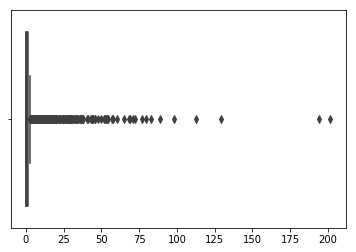

In [949]:
sns.boxplot(reg_predict)

# Gradient Boosting

In [960]:
from sklearn.ensemble import GradientBoostingRegressor

In [962]:
gb = GradientBoostingRegressor(random_state=42)

In [963]:
gb.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [964]:
gb_predict = gb.predict(X_test)

In [965]:
gb_predict

array([ 0.02242292, -0.01680662, -0.02201891, ...,  0.32247215,
       -0.02453552, -0.02388993])

In [966]:
gb_predict[gb_predict < 0 ] = 0

In [967]:
gb_predict

array([0.02242292, 0.        , 0.        , ..., 0.32247215, 0.        ,
       0.        ])

In [968]:
resultados = pd.DataFrame()
resultados['revenue'] = y_test
resultados['predict'] = gb_predict
resultados['erro'] = gb_predict - y_test

In [969]:
resultados[resultados.revenue > 0]

revenue     predict        erro
3006    32.49   14.505124  -17.984876
5928    74.85   36.134350  -38.715650
8361   424.50   18.393429 -406.106571
8612    55.99   16.464665  -39.525335
416     15.19   22.497453    7.307453
4077     5.97   15.257141    9.287141
8146    27.19   13.450182  -13.739818
4908   372.65  129.532697 -243.117303
9395    29.98   20.454685   -9.525315
8728   101.95   89.091395  -12.858605
9609    95.80   13.307701  -82.492299
1691    19.19   57.599586   38.409586
568    278.03   45.995897 -232.034103
8288   478.40   32.214857 -446.185143
5478   112.37   44.215185  -68.154815
532      7.99   12.983260    4.993260
3033    39.99    8.600516  -31.389484
7508   479.03   52.711156 -426.318844
9918    45.57   34.125562  -11.444438
8542    25.90   98.382769   72.482769
742     41.72    8.633265  -33.086735
5331   489.20   30.006783 -459.193217
9742   239.88   13.504088 -226.375912
3948    23.97   79.708063   55.738063
5457   647.53  194.458684 -453.071316
5157    33.59    2.814413  -30.775587
7282    26.95  201.625359  174.675359
6765    64.94   64.664597   -0.275403
467     67.19   14.211387  -52.978613
3653    49.19   53.045618    3.855618
5381   374.85   14.284207 -360.565793
5314   107.94   60.075240  -47.864760
6680     8.48   82.754443   74.274443
132     26.49   15.684607  -10.805393
8098    24.27   16.215595   -8.054405
7942    52.02   34.395141  -17.624859
8314   119.99   27.903397  -92.086603
9085    14.00    9.995950   -4.004050
3656   217.44   29.209760 -188.230240
4317   284.34   68.106919 -216.233081
3319   330.51   40.989078 -289.520922
5729    79.16   51.846569  -27.313431
9580    13.59   36.385387   22.795387
7612   239.60   17.859305 -221.740695
3910    32.94   40.608364    7.668364
6568     3.49   17.808387   14.318387
4818   571.69  112.664229 -459.025771

In [970]:
np.sqrt(mean_squared_error(y_test,gb_predict))

23.65957072035255